In [1]:
# fmt: off
from Utilities.Utils import plot_images
from Utilities.Interpretability.InterpretabilityMethods import * 
from Utilities.Tasks.CIFAR10ClassificationTask import CIFAR10ClassificationTask as Task
from Utilities.AdversarialTraining import AdversarialExampleTrainer

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf
# fmt: on
print(tf.config.list_physical_devices('GPU'))

[]


In [2]:
MODEL_SAVE_PATH = "models/CIFAR10_INTERLEAVED_ADVERSARIAL_MODEL/"
model:tf.keras.models.Model = tf.keras.models.load_model(MODEL_SAVE_PATH, compile=False) # type: ignore
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

task = Task(
    "Task1",
    model,
    loss_fn,
    task_labels=[0,1,2,3,4,5,6,7,8,9],
    training_batches=250,
    validation_batches=100,
    batch_size=32,
    # data_path="../../datasets/IntelNaturalScenes"
)
task.compile_model(loss_fn)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_0 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                               

In [3]:
EPSILON = 0.01
adversarial_example_trainer = AdversarialExampleTrainer(task)

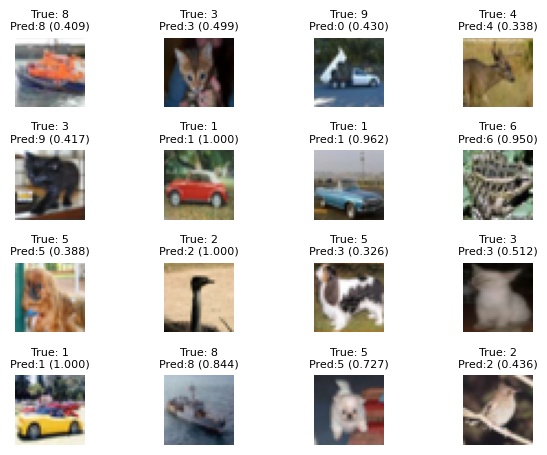

In [5]:
adversarial_example_trainer.display_adversarial_images(epsilon=0.0, num_images=16, titles=True, use_validation_dataset=True)

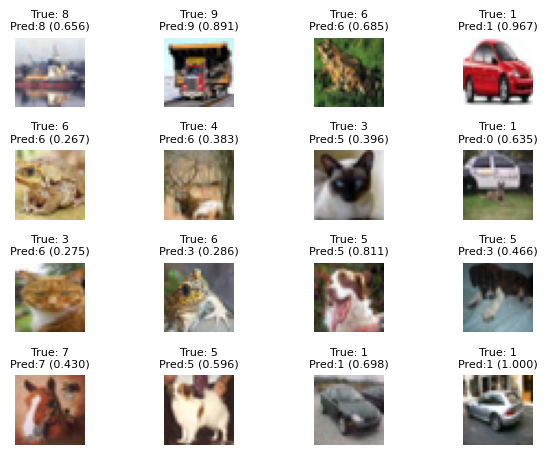

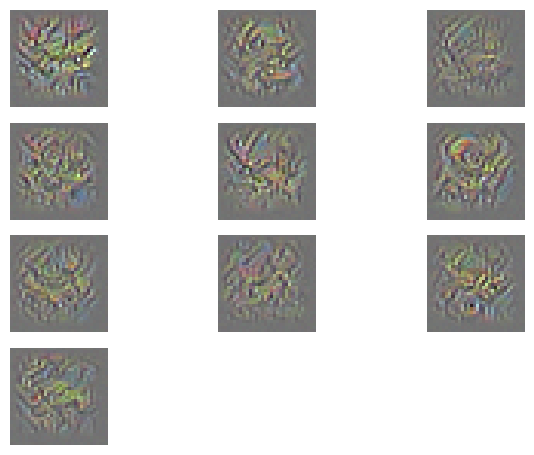

CLASS 0:
	Model Prediction: 8
	Confidence: 0.025366511195898056
CLASS 1:
	Model Prediction: 4
	Confidence: 0.05675395578145981
CLASS 2:
	Model Prediction: 4
	Confidence: 5.547672685679572e-07
CLASS 3:
	Model Prediction: 8
	Confidence: 0.0019066830864176154
CLASS 4:
	Model Prediction: 4
	Confidence: 0.9430320262908936
CLASS 5:
	Model Prediction: 5
	Confidence: 0.5713597536087036
CLASS 6:
	Model Prediction: 8
	Confidence: 0.0030298263300210238
CLASS 7:
	Model Prediction: 4
	Confidence: 1.563961814099457e-05
CLASS 8:
	Model Prediction: 4
	Confidence: 0.31605055928230286
CLASS 9:
	Model Prediction: 8
	Confidence: 0.0001631792401894927


In [7]:
adversarial_example_trainer.display_adversarial_images(EPSILON, 16, True)
maximal_class_activations(model)

In [8]:
task.train_on_task(epochs=1)

250/250 [==============================] - 20s 73ms/step - loss: 0.2284 - base_loss: 0.2284 - val_loss: 2.0901 - val_base_loss: 2.0901


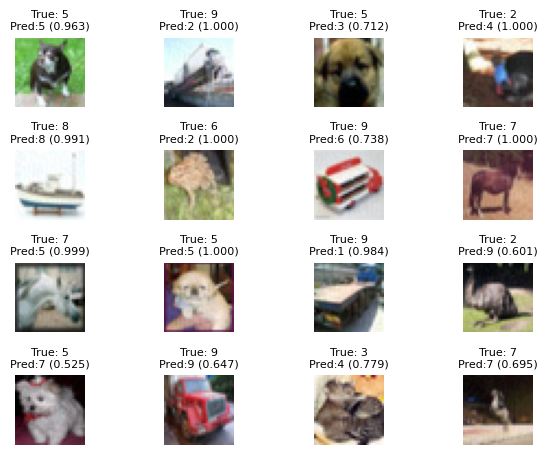

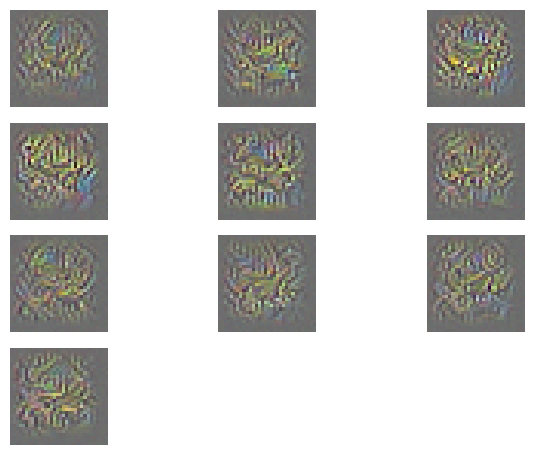

CLASS 0:
	Model Prediction: 6
	Confidence: 4.963302504100679e-28
CLASS 1:
	Model Prediction: 6
	Confidence: 0.0
CLASS 2:
	Model Prediction: 6
	Confidence: 2.143414785937825e-11
CLASS 3:
	Model Prediction: 3
	Confidence: 0.9999999403953552
CLASS 4:
	Model Prediction: 4
	Confidence: 0.9660505652427673
CLASS 5:
	Model Prediction: 3
	Confidence: 1.4668219763813717e-11
CLASS 6:
	Model Prediction: 3
	Confidence: 0.00022099858324509114
CLASS 7:
	Model Prediction: 6
	Confidence: 1.1125877779835647e-12
CLASS 8:
	Model Prediction: 6
	Confidence: 4.35894398833625e-05
CLASS 9:
	Model Prediction: 6
	Confidence: 0.0


In [9]:
adversarial_example_trainer.display_adversarial_images(EPSILON, 16, True)
maximal_class_activations(model)